## Analisi delle pagine scaricate

In [ ]:
from bs4 import BeautifulSoup
import sys
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
stats = []
for i in range(0,5700):
    with open(".\\pages\\"+str(i)+".html", 'r' , encoding="UTF-8") as f:
        webpage = f.read()
        soup = BeautifulSoup(webpage)    
        [x.extract() for x in soup.findAll('script')]
        [x.extract() for x in soup.findAll('style')]
        countP = soup.findAll("div")    
        count = soup.findAll()
        url = soup.findAll("link", {"rel" : "canonical"})
        #coeff = len(count)/(len(count)+len(tokens))
        coeff = len(countP)/(len(count))
        temp = [len(countP) , coeff , url[0].get("href")]
        #temp = [len(countP),len(count) , url[0].get("href")]
        stats.append(temp)
        if( i%250 == 0):
            print(i)


In [85]:
import numpy as np

#npstats = np.array(stats)
#np.save("test0-6000.npy" , npstats)
npstats = np.load("test0-6000.npy")


## Conta delle occorrenze nella quantità dei DIV

In [29]:
occurrencies = np.zeros(600)
maxm = 0
for row in npstats :
    #if(int(row[0]) > maxm):
        #maxm = int(row[0])
    occurrencies[int(row[0])] += 1 

for i in range(len(occurrencies)):
    if occurrencies[i] > 15 :
        occurrencies[i] = 15 

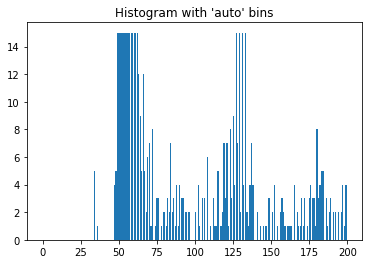

In [30]:
import matplotlib.pyplot as plt

#plt.hist(results_2D[:100,:])  # arguments are passed to np.histogram
plt.bar(range(200), occurrencies[:200])
plt.title("Istogramma della conta dei DIV")
plt.show()

## Conta delle occorrenze nel rapporto tra DIV e conta totale dei tag

In [19]:
coeff_array = np.rint(np.asarray(npstats[:, 1], dtype='float64')*1000)

In [26]:
coeff_occurrencies = np.zeros(300)

for crow in coeff_array :
    coeff_occurrencies[int(crow)] += 1 

for i in range(len(coeff_occurrencies)):
    if coeff_occurrencies[i] > 25 :
        coeff_occurrencies[i] = 25 

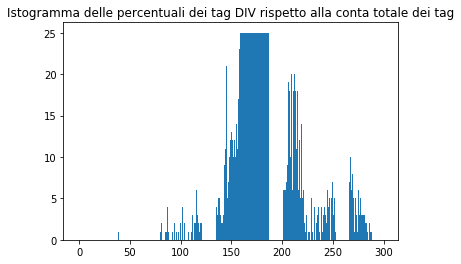

In [31]:
import matplotlib.pyplot as plt

#plt.hist(results_2D[:100,:])  # arguments are passed to np.histogram
plt.bar(range(300), coeff_occurrencies)
plt.title("Istogramma delle percentuali dei tag DIV rispetto alla conta totale dei tag")
plt.show()

## Analisi risultati

In [88]:
import pandas as pd
pages = np.load("test0-6000.npy")
df = pd.DataFrame(data=pages)
df

,0,1,2
0,253,0.24975320829220138,https://www.androidworld.it/schede/HTC-Desire-...
1,60,0.19230769230769232,https://www.androidworld.it/2017/03/09/zte-axo...
2,53,0.18275862068965518,https://www.androidworld.it/2016/04/27/office-...
3,51,0.17346938775510204,https://www.androidworld.it/2017/02/17/prezzi-...
4,54,0.16981132075471697,https://www.androidworld.it/2014/02/23/huawei-...
5,51,0.17770034843205576,https://www.androidworld.it/2014/12/09/meizu-k...
6,60,0.17595307917888564,https://www.androidworld.it/2015/11/26/il-blac...
7,129,0.21287128712871287,https://www.androidworld.it/tag/personalizzazi...
8,52,0.18705035971223022,https://www.androidworld.it/2014/02/05/lg-g-pr...
9,53,0.18213058419243985,https://www.androidworld.it/2015/10/28/google-...


In [81]:
t1 = 0.20
t2 = 0.23

over23 = df.loc[(df[1].astype(float) >= t2)][0].size
schede = df.loc[ (df[2].str.contains("/schede/"))][0].size
int_schede = df.loc[ (df[2].str.contains("/schede/")) & (df[1].astype(float) >= t2)][0].size

between21_23 = df.loc[(df[1].astype(float) < t2) & (df[1].astype(float) > t1) ][0].size
tags = df.loc[(df[2].str.contains("/tag/"))][0].size
int_tags = df.loc[((df[1].astype(float) < t2) & (df[1].astype(float) > t1)) & (df[2].str.contains("/tag/"))][0].size


under20 = df.loc[(df[1].astype(float) <= t1)][0].size
#posts = df.loc[ (df[2].str.contains("/(2015|2016|2017|2018|2019)/"))].size


print("Sopra T1 : "+str(over23))
print("Pagine 'Schede' : "+str(schede))
print("Tra T1 e T2 : "+str(between21_23))
print("Pagine 'Tag' : "+str(tags))
print("Sotto T1 : "+str(under20))
#print("Pagine 'Posts' : "+str(posts))

Sopra T1 : 228
Pagine 'Schede' : 225
Tra T1 e T2 : 254
Pagine 'Tag' : 260
Sotto T1 : 5218


In [84]:
print("Precision Schede : "+ str(int_schede/over23))
print("Recall Schede : "+ str(int_schede/schede))
print("")
print("Precision Tags : "+ str(int_tags/between21_23))
print("Recall Tags : "+ str(int_tags/tags))



Precision Schede : 0.9868421052631579
Recall Schede : 1.0

Precision Tags : 0.9330708661417323
Recall Tags : 0.9115384615384615


## Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
X = npstats[:,:2]
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
import seaborn as sns; sns.set() 

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
y_kmeans = y_kmeans.reshape((1000, 1))

In [ ]:
print(npstats.shape)
print(y_kmeans.shape)

In [ ]:
np.set_printoptions(threshold=9999)
results = np.append(npstats, y_kmeans, axis=1)

In [ ]:
n_schede = df.loc[df[2].str.contains("/schede/")].size
n_tag = df.loc[df[2].str.contains("/tag/")].size

print(n_schede)
print(n_tag)

In [ ]:
n_ones = (df.loc[(df[3]) == "0"]).size
print(n_ones)